# ML Powered Applications

# Chapter 4

Data exploration notebook to better understand the data.

Objective
- To label and identify trends

Process
- Generate summary statistics
- Identifying differences in class distributions

In [ ]:
# run script on a 3.6 environment - base36
!pip install -U spacy
!pip install -U umap-learn
!python -m spacy download en_core_web_sm
!pip install --upgrade gensim

In [1]:
# library dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# intialization
PATH_data = r"C:\Users\nrosh\Desktop\Personal Coding Projects\Python\ml-powered-applications\neel\data"

## Clustering

### Definitions

1. Clustering
    - Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)
    - Many clustering algorithms group data points by measuring the distance between points and assigning ones that are close to each other to the same cluster.
    - The vast majority of datasets can be separated into clusters based on their features, labels, or a combination of both. Examining each cluster individually and the similarities and differences between clusters is a great way to identify structure in a dataset.
    - Clustering algorithms work on vectors, so we can’t simply pass a set of sentences to a clustering algorithm. To get our data ready to be clustered, we will first need to vectorize it.

2. Vectorization
    - A process of converting a raw data set into a singular or multi-dimensional vector


### Vectorization techniques

Clustering requires distances to be measured on the "same" scale.

The approach for vectorizing/normalizing data depends on the structure and type of data being analysed.

1. Tabular data
    - Continuous features should be normalized to a common scale
    - Categorical features such as colors can be converted to a one-hot encoding (binary transformations). This allows the distance between points to always remain the same.
    
2. Text data

    - Bag Of Words (Tokenize sentences and count their observations by row)
        - The simplest way to vectorize text is to use a count vector, which is the word equivalent of one-hot encoding.
        - For each sentence, the number at each index represents the count of occurrences of the associated word in the given sentence.
        -This method ignores the order of the words in a sentence
        - scikit-learn TfidfVectorizer
            - Produce a vector of tokenized words for count aggregation by row
            - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

    - Word2ec and fastText
        - These vectorization techniques produce word vectors that attempt to learn a representation that captures similarities between concepts better than a TF-IDF encoding. 
        - They do this by learning which words tend to appear in similar contexts in large bodies of text such as Wikipedia.
        - This approach is based on the distributional hypothesis, which claims that linguistic items with similar distributions have similar meanings.
            - This is done by learning a vector for each word and training a model to predict a missing word in a sentence using the word vectors of words around it. 
            - The number of neighboring words to take into account is called the window size.
    - Dimensionality Reduction
        - Vectorized data are multi-dimensional and can't be visualized
        - The goal is to use a method that reduces multidimensional data into a visual space whilst minimizing the data loss associated with dimensional reduction
        - Techniques
            - t-SNE
            - UMAP
        - These techniques are useful for to notice patterns in data on a very high level
        - The goal is to use these methods to see whether there are regions of the data that can easily be seperated by a production model
        - 

UMAP
    - General purpose manifold learning and dimension reduction algorithm
    
    
Once we have a vectorized representation of our unstructured data, we can use it for the purpose of data inspection/exploration or outcome predictions.

1. Inspection
        - Dimensionality Reduction
             - Vectors produced from unstructured data often have more than one dimension. The dataset needs to be reduced in some way for us to visualize it on a two-dimensional plane.
             - 

2. Prediction





### Labelling Strategy
Feel free to update your vectorization strategy by adding any features you discover to help make your data representation as informative as possible, and go back to labeling.


In [2]:
from IPython.display import Image
Image(url="vectorization_strategy.png")

## Statistics Observed

1. Are there distinct regions of post's title that can be classified into one or multiple labels?
    
Sources:
- stackexchange: 
    - Data Schema: https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede
    - Score: https://meta.stackexchange.com/questions/229255/what-is-the-score-of-a-post
    - UMAP: https://umap-learn.readthedocs.io/en/latest/
    
- word2vec: https://code.google.com/archive/p/word2vec/

## Functions

In [3]:
def export_df(df, cols, **kwargs):

    # rename and return a dataframe of those columns
    # choose to export or not
    
    _df = df.loc[:, cols]
    
    # rename dict
    if "rename_dict" in kwargs.keys() :
        _df.rename(columns=kwargs["rename_dict"], inplace=True)
        print('- Columns renamed.')
    
    # export data
    if kwargs["export_loc"]:
        
        # handle data export
        try:
            
            if "export_name" in kwargs.keys():
                _location = kwargs["export_loc"] + "\\{}".format(kwargs["export_name"]) + ".csv"
                _df.to_csv(_location)
                print(f"""- File exported to: {_location}""")
            else:
                _location = kwargs["export_loc"]+"\\adhoc_{}".format(datetime.today().strftime("%m%d%y"))+".csv"
                _df.to_csv(_location)
                print(f"""- File exported to: {_location}""")

        except:
            raise Exception(f"""export_loc must be of type str. Given: {type(kwargs["export_loc"])}""")
    
    print('\n')
    return _df

## Ingestion


In [4]:
# original
df_orig = pd.read_csv(
    PATH_data + "\\out\cleaned_data.csv",
)

# copies
df = df_orig.iloc[:, 1::].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42605 entries, 0 to 42604
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PostTypeId            42605 non-null  int64  
 1   AcceptedAnswerId      5081 non-null   float64
 2   ParentId              31935 non-null  float64
 3   AnswerCount           9935 non-null   float64
 4   CommentCount          42605 non-null  int64  
 5   FavoriteCount         4052 non-null   float64
 6   LastActivityDate      42605 non-null  object 
 7   CreationDate          42605 non-null  object 
 8   ClosedDate            1294 non-null   object 
 9   LastEditDate          15252 non-null  object 
 10  Score                 42605 non-null  int64  
 11  Title                 9935 non-null   object 
 12  body_text             42519 non-null  object 
 13  fe_tenure             42605 non-null  float64
 14  fe_isclosed           42605 non-null  int64  
 15  fe_isquestion      

## Theory


#### Calculating Cosine Similarity

In [5]:
import random as rand

def cosine_sim(X, Y):
    
    # function to aggregate two vectors into a real number that represents how close these vectors are
    # Source: https://en.wikipedia.org/wiki/Cosine_similarity
    
    cs1 = np.sum([X[i]*Y[i] for i in range(len(X))])
    cs2 = (np.sum(np.power(X, 2))**0.5)*(np.sum(np.power(Y, 2))**0.5)
    cs = cs1/cs2

    return cs, cs1, cs2

In [6]:
# cosine similarity of two vectors

mast_A = [
    [rand.randrange(0, 10) for i in range(10)],
    [-0.4, 0.8],
    [-0.4, 0.8]
]

mast_B = [
    [rand.randrange(0, 10) for i in range(10)],
    [-0.3, 0.2],
    [-0.5, -0.4]
]

for i in range(3):
    
    print(f"""
        --
        
        Given,
            X: {mast_A[i]}
            Y: {mast_B[i]}

        Cosine Similarity: 

            cs: {np.round(cosine_sim(mast_A[i], mast_B[i])[0], 2)}
            cs1: {np.round(cosine_sim(mast_A[i], mast_B[i])[1], 2)}
            cs2: {np.round(cosine_sim(mast_A[i], mast_B[i])[2], 2)}
        
    """)


        --
        
        Given,
            X: [3, 7, 1, 9, 1, 4, 4, 8, 3, 7]
            Y: [2, 9, 3, 0, 0, 4, 6, 8, 6, 7]

        Cosine Similarity: 

            cs: 0.82
            cs1: 243
            cs2: 295.0
        
    

        --
        
        Given,
            X: [-0.4, 0.8]
            Y: [-0.3, 0.2]

        Cosine Similarity: 

            cs: 0.87
            cs1: 0.28
            cs2: 0.32
        
    

        --
        
        Given,
            X: [-0.4, 0.8]
            Y: [-0.5, -0.4]

        Cosine Similarity: 

            cs: -0.21
            cs1: -0.12
            cs2: 0.57
        
    


#### Word Embeddings

In [7]:
# Use tsne to output GloVe word embeddings
# source: https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-glove.html

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy

# Returns a Language Object
nlp        = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner", "textcat"])

print('Total word vectors:', len(nlp.vocab.vectors))

Total word vectors: 684831


 
    
    
    Similarity spectrum of word embeddings for a list of words.



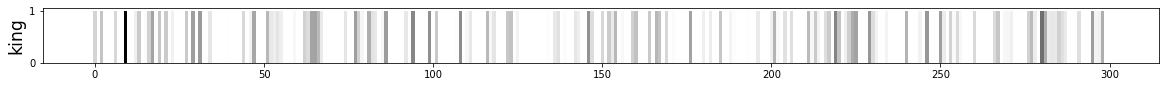

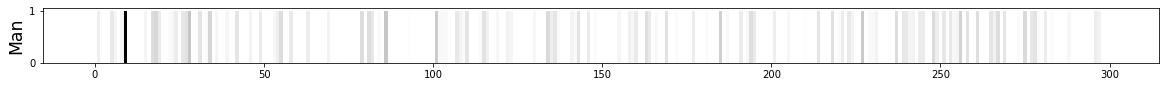

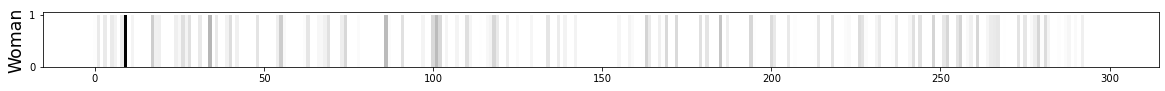

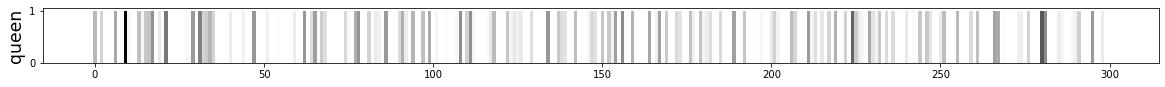

In [8]:
# visualize embeddings - Dark bands represent positively higher similarities
from matplotlib import cm

# words of curiosity
post_titles = pd.Series([
    "king", "Man", 
    "Woman", "queen"
])

# get embedding and formalize
spacy_vectors  = post_titles.apply(lambda x: nlp(x).vector)
title_emb = dict(zip(post_titles, spacy_vectors)) 

print(f""" 
    
    
    Similarity spectrum of word embeddings for a list of words.
""")

# iterate between words in a pandas series
for i in range(len(post_titles)):
    
    # visualization parameters
    colors = cm.gist_yarg(spacy_vectors[i] / float(max(spacy_vectors[i]))) # color vector to hue the bars
    x = range(len(spacy_vectors[0])) # position of each bar

    # plot
    fig = plt.figure(figsize=[20, 1])
    fig.gca().set_ylabel(post_titles.loc[i], fontsize="xx-large")
    
    # plot the similairy spectrum for each word
    bar = plt.bar(
        x,
        1,
        1,
        color=colors,
        figure=fig
    )


### Analogies: King - man + woman

Apply mathematical operations to approximate deductive reasoning.

In [9]:
# Source: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#links

from gensim import models
import gensim.downloader as api


In [10]:
# load a pretrained word2vec model
wv = api.load('word2vec-google-news-300')
type(wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [11]:
# Define baseline entities to infer analogy
baseline_entities = {
    "positive": ["king", "queen"],
    "negative": ["man"]
}

most_similar = wv.most_similar(
    positive=baseline_entities["positive"], 
    negative=baseline_entities["negative"]
)

title_emb["king-man+woman"] = spacy_vectors[0] - spacy_vectors[1] + spacy_vectors[2] 

print(title_emb.keys())
pd.DataFrame(data=most_similar, columns=["Word", "Similarity Score"])

dict_keys(['king', 'Man', 'Woman', 'queen', 'king-man+woman'])


,Word,Similarity Score
0,queens,0.595019
1,monarch,0.581505
2,kings,0.561299
3,royal,0.520453
4,princess,0.519152
5,princes,0.508639
6,NYC_anglophiles_aflutter,0.505731
7,Queen_Consort,0.492567
8,Queen,0.482257
9,royals,0.478174


In [12]:
# generate entity vectors for words closest to
post_titles = pd.Series([
    "queens", "kings", "monarch", "royals"
])

# get embedding and formalize
spacy_vectors  = post_titles.apply(lambda x: nlp(x).vector)
similarity_emb = dict(zip(post_titles, spacy_vectors)) 


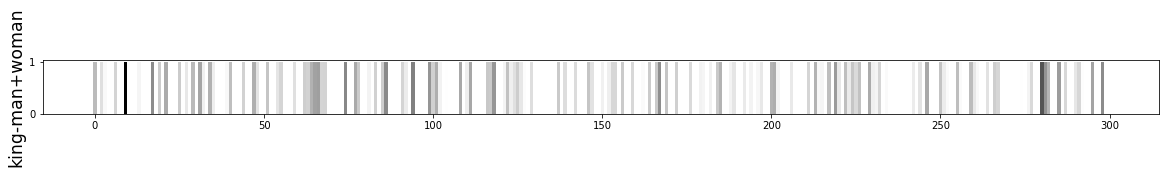

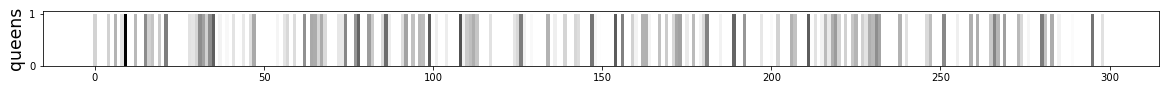

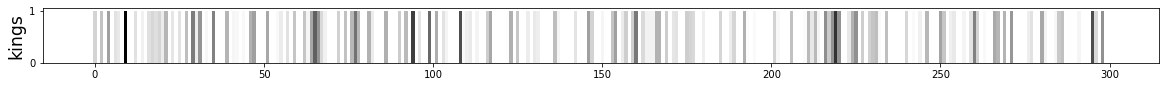

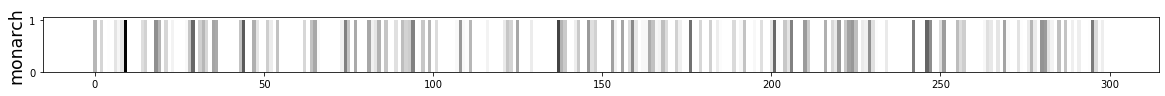

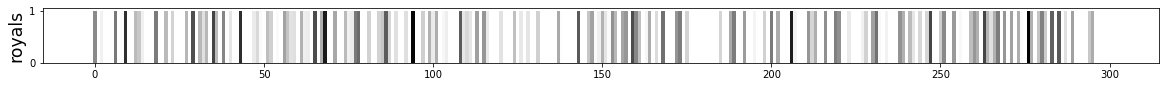

In [13]:
for k in ["king-man+woman", "king", "Man", "Woman"]:
    
    # visualization parameters
    colors = cm.gist_yarg(title_emb[k] / float(max(title_emb[k]))) # color vector to hue the bars
    x = range(len(title_emb["king"])) # position of each bar

    # plot
    fig = plt.figure(figsize=[20, 1])
    fig.gca().set_ylabel(k, fontsize="xx-large")
    
    # plot the similairy spectrum for each word
    bar = plt.bar(
        x,
        1,
        1,
        color=colors,
        figure=fig
    )
    
    break # for result only
    
for k in post_titles:
    
    # visualization parameters
    colors = cm.gist_yarg(similarity_emb[k] / float(max(similarity_emb[k]))) # color vector to hue the bars
    x = range(len(similarity_emb["queens"])) # position of each bar

    # plot
    fig = plt.figure(figsize=[20, 1])
    fig.gca().set_ylabel(k, fontsize="xx-large")
    
    # plot the similairy spectrum for each word
    bar = plt.bar(
        x,
        1,
        1,
        color=colors,
        figure=fig
    )

## Dimensionality Reduction
Using UMAP and Clustering to reduce the dimensional plane of the word embeddings such that they can be visualized

In [14]:
# construct embeddings for the questions listed on the post titles
post_titles = df.loc[df["PostTypeId"] == 1, "Title"]
post_title_vectors  = post_titles.apply(lambda x: nlp(x).vector)

df_emb = pd.DataFrame(
    {
        "PrimaryID"          : df.loc[df["PostTypeId"] == 1, "Title"].index,
        "post_title"         : post_titles.to_list(),
        "vector_embedding"   : post_title_vectors,
        "question_answered"  : df.loc[df["PostTypeId"]==1, "fe_question_answered"]\
                                .apply(lambda row: True if row==1 else False)
    }
)

df_emb.head()

,PrimaryID,post_title,vector_embedding,question_answered
0,0,What are some online guides for starting writers?,"[-0.10661605, 0.03610366, -0.2071911, -0.09730...",True
1,1,What is the difference between writing in the ...,"[0.030192435, 0.17830364, -0.15917613, -0.0375...",True
2,2,How do I find an agent?,"[-0.041871004, 0.2692384, -0.35695228, -0.0176...",True
3,3,Decide on a theme/overarching meaning before w...,"[0.06479893, 0.12482646, -0.17649439, 0.103116...",False
4,4,What is Literary Fiction?,"[-0.075017, 0.14935397, 0.12835646, -0.0957822...",True


### umap to reduce dimensions

In [15]:
from sklearn.cluster import KMeans
import umap

# initialization
n_clusters=3

# Fit UMAP to our data, and return the transformed data
reducer = umap.UMAP()
umap = reducer.fit_transform(post_title_vectors.to_list())

# cluster the data using K Means
clus = KMeans(n_clusters=n_clusters, random_state=10)
clusters = clus.fit_predict(post_title_vectors.to_list())

# check to see that the length of the original is the same as reduced
print(f"""
   
   original: {len(post_title_vectors.to_list())}
   reduced:  {len(umap)}
   
""")

C:\ProgramData\anaconda3\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")



   
   original: 9935
   reduced:  9935
   



In [16]:
# create a dataframe for seaborn visualization
import seaborn as sns

df_dim = pd.DataFrame(
    {
        "PrimaryId"          : df_emb.PrimaryID,
        "post_title"         : df_emb.post_title,
        "x"                  : umap[:, 0],
        "y"                  : umap[:, 1],
        "question_answered"  : df_emb.question_answered,
        "cluster"            : clusters
    }
)

# differentiate between answered questions
df_answered = df_dim.loc[df_dim.question_answered == 1]
df_nanswered = df_dim.loc[df_dim.question_answered == 0]

In [17]:
export_loc = PATH_data+"\\labelling"

# columns to select
cols_s = [
    'PrimaryId', 'post_title', 
    'x', 'y', 
    'question_answered', 'cluster',
]

# export and display df info
export_df(df_dim, cols_s, export_loc=export_loc, export_name="questions_by_cluster").info()

- File exported to: C:\Users\nrosh\Desktop\Personal Coding Projects\Python\ml-powered-applications\neel\data\labelling\questions_by_cluster.csv


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9935 entries, 0 to 42603
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PrimaryId          9935 non-null   int64  
 1   post_title         9935 non-null   object 
 2   x                  9935 non-null   float32
 3   y                  9935 non-null   float32
 4   question_answered  9935 non-null   bool   
 5   cluster            9935 non-null   int32  
dtypes: bool(1), float32(2), int32(1), int64(1), object(1)
memory usage: 359.0+ KB


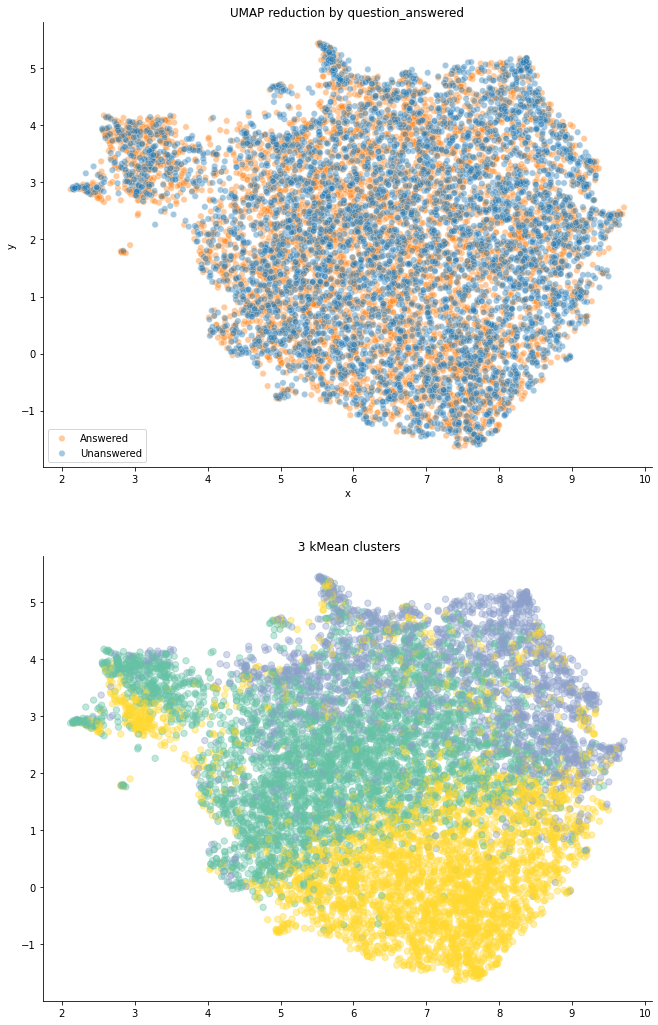

In [18]:
import matplotlib.ticker as ticker

# visualize results
fig = plt.figure(figsize=(24, 18))
cmap = plt.get_cmap("Set2")

color_map = {
    True: '#ff7f0e',
    False:'#1f77b4'
}

# Plot umap clusters
ax1 = plt.subplot(221)
umap_answered = sns.scatterplot(
    x=df_answered.x,
    y=df_answered.y,
    c=[color_map[True] for i in range(0, len(df_answered))],
    axes=ax1,
    s=40, 
    alpha=.4,
    label="Answered"
)

umap_nanswered = sns.scatterplot(
    x=df_nanswered.x,
    y=df_nanswered.y,
    c=[color_map[False] for i in range(0, len(df_nanswered))],
    axes=ax1,
    s=40, 
    alpha=.4,
    label="Unanswered"
)

ax1.set_title("UMAP reduction by question_answered")
ax1.legend(loc=3)

# K-Mean clusters
ax_3 = plt.subplot(223)
kmean_clus = plt.scatter(
    df_dim.x, 
    df_dim.y, 
    c=[cmap(x/n_clusters) for x in clusters], 
    s=40, 
    alpha=.4
)
ax_3.set_title(" {} kMean clusters".format(len(np.unique(clusters))))


sns.despine()

## Optimizing for Clusters

1. Sources
 - Selecting the optimal number of clusters, https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

2. Silhouette coefficients
 - near +1 indicates that the sample is far away from the neighboring clusters. 
 - 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
 - The further away a point is from it's decision boundary, the more likely that is part of it.
 - The score determines the average distance of all points from their decision boundary

In [19]:
from sklearn.metrics import silhouette_score

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters

# initialization
range_n_clusters = [2, 3, 4, 5, 6]
_clusters = []
_silscores = []

for n_clusters in range_n_clusters:
    
    # perform clustering operations
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(post_title_vectors.to_list())
    
    # determine silhouette_avg scores
    silhouette_avg = silhouette_score(post_title_vectors.to_list(), cluster_labels, metric='cosine')
    
    # save data
    _clusters.append(n_clusters) 
    _silscores.append(silhouette_avg)
    
# evaluate performance
df_clusperf = pd.DataFrame(
    data={
        "clusters": _clusters,
        "silhoutte_scores": _silscores
    }
)



## Model Evaluation

In [20]:
# get optimal number of clusters by determining the average distance all points are from their decision boundaries
optimal_clusters = df_clusperf.sort_values("silhoutte_scores", ascending=False).loc[0, "clusters"]

df_clusperf

,clusters,silhoutte_scores
0,2,0.212580
1,3,0.031035
2,4,0.019113
3,5,0.014150
4,6,0.013796


## Model Retraining

In [21]:
class YAMLHandler:
    
    # class to handle reading and writing yaml files to location
    yaml = {}
    
    def __init__(self):
        pass
    
    def read(self, read_loc):
        
        # read_loc str
        
        self.read_loc = read_loc
        try:
            with open(read_loc, 'r') as stream:
                return yaml.safe_load(stream)
        except Exception as e:
            print(e)
        pass

    def write(self, write_loc, data):
        
        # write_loc str
        # data json
        
        try:
            with io.open(write_loc, 'w', encoding='utf8') as outfile:
                yaml.dump(
                    data, 
                    outfile, 
                    default_flow_style=False, 
                    allow_unicode=True
                )
            print('Data written to {}'.format(write_loc))
        except Exception as e:
            print(e)
        pass

### Export model

In [22]:
from joblib import dump, load
import yaml
import io

# save model onto back end
clf = KMeans(n_clusters=n_clusters, random_state=10)
clf_labels = clusterer.fit_predict(post_title_vectors.to_list())

# save conditions
model_params = {
    "model_location" : '..\pretained_models\kmeans_optimal.joblib',
    "yaml_location" : '..\pretained_models\kmeans_optimal.yaml',
    "opt_clusters"  : str(optimal_clusters)
}

# save model
dump(clf, model_params["model_location"]) 

# save model metadata
YAML = YAMLHandler()
YAML.write(model_params["yaml_location"], model_params)


Data written to ..\pretained_models\kmeans_optimal.yaml


### Import model and produce new data set

In [25]:
# load model and check for equality
loc_modelparams = '..\pretained_models\kmeans_optimal.yaml'

kmeans_params = YAML.read(loc_modelparams)
kmeans_params

{'model_location': '..\\pretained_models\\kmeans_optimal.joblib',
 'opt_clusters': '2',
 'yaml_location': '..\\pretained_models\\kmeans_optimal.yaml'}

In [26]:
# generate word embeddings
post_title_vectors.to_list()

# load the model and generate cluster predictions
clf_loaded = load(kmeans_params['model_location'])
clf_labels_loaded = clusterer.fit_predict(post_title_vectors.to_list()) 

# check for equality
_data = {}
_data[True] = 0
_data[False] = 0

for val in (clf_labels == clf_labels_loaded):
    _data[val] += 1
    
_data

{True: 9935, False: 0}